In [31]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv(r"/content/cleanedhotspots.csv")
df.replace({"PUBLIC WORSHIP": "OTHERS", "DORMITORY / CARE CENTRE": "OTHERS", "TOURIST ATTRACTION":"OTHERS"})
df.head() 

,X,Y,Name,location_name.2.1,location_type.2.1,address.2.1,Description.8.2.1
0,103.747514,1.350191,kml_1,BUKIT BATOK CC,COMMUNITY,21 BUKIT BATOK CENTRAL,M1
1,103.836092,1.428036,kml_2,1 NORTHPOINT DRIVE,COMMUNITY,1 NORTHPOINT DRIVE,M1
2,103.846479,1.286329,kml_4,20 UPPER PICKERING ST,COMMUNITY,20 UPPER PICKERING STREET,M1
3,103.792241,1.427493,kml_7,ACE THE PLACE CC,COMMUNITY,120 WOODLANDS AVENUE 1,M1
4,103.888186,1.375252,kml_15,ACACIA RC,COMMUNITY,698C HOUGANG STREET 52,M1


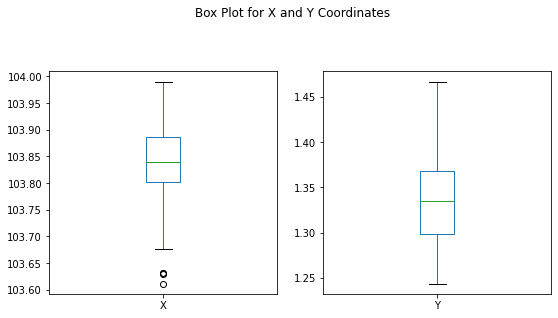

In [32]:
df.drop(['location_type.2.1','Name','location_name.2.1','address.2.1','Description.8.2.1'] , axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for X and Y Coordinates')
plt.savefig('coordinates')
plt.show()

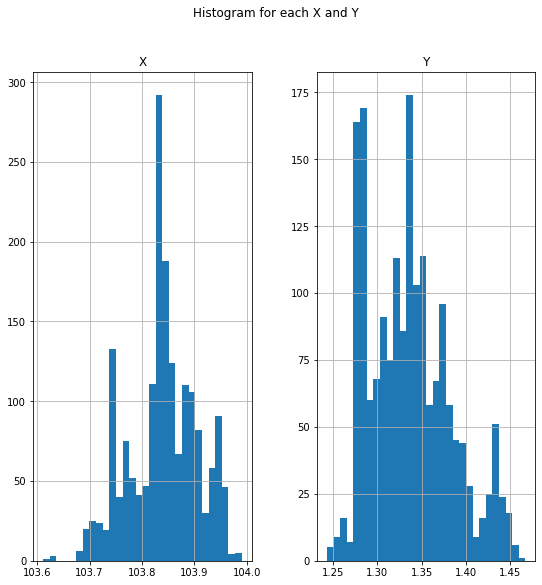

In [33]:
import pylab as pl
df.drop(['location_type.2.1','Name','location_name.2.1','address.2.1','Description.8.2.1'] , axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each X and Y")
plt.savefig('Histogram of X and Y')
plt.show()

In [34]:
feature_names = ['X', 'Y']
X = df[feature_names]
y = df['location_type.2.1']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 


Below We Use a Simple Logistic Regression Algorithm Provided by sklearn

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.39
Accuracy of Logistic regression classifier on test set: 0.36


Below we use Decision Tree Classification from sklearn

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.45


In [37]:
import numpy as np
y_pred = clf.predict(X_test) 
garbled_data = df.tail(200)['location_type.2.1'].tolist() #Last 200 rows all happen to be F&B 

correct = np.count_nonzero(y_pred[:200] == "F&B") 
print(correct)

42


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.55
Accuracy of K-NN classifier on test set: 0.47


In [42]:
import numpy as np
y_pred_knn = knn.predict(X_test) 
garbled_data = df.tail(200)['location_type.2.1'].tolist() #Last 200 rows all happen to be F&B 

correct_knn = np.count_nonzero(y_pred_knn[:200] == "F&B") 
print(correct_knn)

46


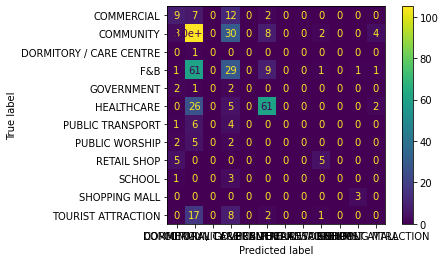

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test) 
plt.show() 